In [1]:
import os
import sys

# Handle relative import of modules
src_path = os.path.abspath(os.path.join("../../src"))
if src_path not in sys.path:
    sys.path.append(src_path)

/Users/simonmaignan/workspace/data-analysis-projects/src


In [2]:
from helpers import kaggle_helper

dataset_folder = "dataset"
kaggle_helper.download_dataset_files(
    dataset_author="sanjeetsinghnaik",
    dataset_name="fifa-23-players-dataset",
    dataset_folder=dataset_folder,
)

Listing local csv files in ./dataset.
File Fifa 23 Players Data.csv with size 7496646 found in ./dataset
Listing files associated with Kaggle dataset sanjeetsinghnaik/fifa-23-players-dataset.
File Fifa 23 Players Data.csv with size 7496646 retrieved from Kaggle API.


In [ ]:
import pandas as pd
import seaborn as sns

pd.set_option("display.max.columns", None)

df_fifa_players = pd.read_csv(f"{dataset_folder}/Fifa 23 Players Data.csv")
print(
    f"The Fifa player data set has {len(df_fifa_players)} players with {df_fifa_players.shape[1]} variables."
)
df_fifa_players.head()

NameError: name 'dataset_folder' is not defined

In [ ]:
print(f"Number of Null in data set = {df_fifa_players.isnull().sum().sum()}")
print(f"Number of NaN in data set = {df_fifa_players.isna().sum().sum()}")

Number of Null in data set = 0
Number of NaN in data set = 0


In [ ]:
# Drop columns without interest
columns_to_drop: List[str] = []
text_to_drop: List[str] = [
    "Image",
    "Euro",
    "Club",
    "Team",
    "Contract",
    "Release Clause",
]
for text in text_to_drop:
    df_fifa_players = df_fifa_players.loc[
        :, ~df_fifa_players.columns.str.contains(text, case=False)
    ]

df_fifa_players.head(20)

,Known As,Full Name,Overall,Potential,Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,RW,CAM,Argentina,35,169,67,2190,452,2021,-,Left,4,4,5,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,"CF,ST",CF,France,34,185,81,2147,455,2009,-,Right,4,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,ST,ST,Poland,33,185,81,2205,458,2022,-,Right,4,4,5,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,"CM,CAM",CM,Belgium,31,181,70,2303,483,2015,-,Right,5,4,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,"ST,LW",ST,France,23,182,73,2177,470,2018,-,Right,4,5,4,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,RW,RW,Egypt,30,175,71,2226,471,2017,-,Left,3,4,4,High,Medium,90,89,82,90,45,75,80,93,59,84,84,90,84,69,77,88,89,91,90,93,91,83,69,87,75,85,63,55,92,85,86,92,38,43,41,14,14,9,11,14,89,88,88,88,88,88,90,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,GK,GK,Belgium,30,199,96,1334,473,2018,-,Left,3,1,4,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,GK,GK,Germany,36,193,93,1535,501,2011,-,Right,4,1,5,Medium,Medium,87,88,91,88,56,91,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,88,91,91,88,43,40,43,43,43,40,50,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,ST,ST,Portugal,37,187,83,2159,445,2021,-,Right,4,5,5,High,Low,81,92,78,85,34,75,80,93,90,80,86,85,81,79,75,88,79,83,77,94,67,93,95,76,77,90,63,29,95,76,90,95,24,32,24,7,11,15,14,11,90,86,88,88,88,86,88,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,CB,CB,Netherlands,30,193,92,2117,461,2018,-,Right,3,2,4,Medium,High,81,60,71,72,91,86,53,52,87,79,45,70,60,70,86,76,68,91,61,89,53,81,88,74,93,64,85,90,47,65,62,90,92,92,86,13,10,13,11,11,74,68,70,70,70,68,73,73,79,73,83,88,83,85,90,85,23


In [ ]:
df_fifa_players.describe()

,Overall,Potential,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Joined On,Weak Foot Rating,Skill Moves,International Reputation,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,25.240412,181.550839,75.173904,1602.114569,357.946221,2020.367442,2.946437,2.366147,1.086305,68.017746,53.777874,58.024327,63.109553,50.241383,64.775338,49.476833,46.255300,51.846755,59.072226,42.513944,55.898754,47.695129,43.006689,53.568423,58.516263,64.725336,64.838341,63.518906,61.542586,64.059550,57.827661,64.795566,63.040455,65.152004,46.825719,55.668537,46.853282,50.520362,54.191542,47.994444,58.036625,46.747505,48.399159,46.264146,16.402125,16.157182,16.061007,16.205944,16.472895,56.725929,55.819138,55.714925,55.714925,55.714925,55.819138,57.950267,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,4.718163,6.858097,7.013593,273.160237,39.628259,2.056372,0.673778,0.772428,0.358753,10.649511,13.619867,9.717950,9.336566,16.392532,9.577715,17.887405,19.623881,17.318947,14.287698,17.635249,18.751691,17.910205,16.997758,14.633838,16.590051,15.280849,15.108259,14.905330,8.900297,14.483193,12.949870,12.293523,16.269330,12.622774,19.362064,16.905505,20.666647,19.660034,13.478006,15.730026,12.036272,20.350228,21.191644,20.701146,17.589457,16.924266,16.680839,17.089109,17.927602,13.475267,14.632018,14.216500,14.216500,14.216500,14.632018,13.905442,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,16.000000,155.000000,49.000000,759.000000,224.000000,2002.000000,1.000000,1.000000,1.000000,28.000000,16.000000,25.000000,28.000000,15.000000,30.000000,6.000000,3.000000,5.000000,10.000000,3.000000,3.000000,6.000000,4.000000,9.000000,5.000000,14.000000,15.000000,18.000000,30.000000,20.000000,18.000000,22.000000,14.000000,25.000000,4.000000,10.000000,3.000000,2.000000,10.000000,6.000000,13.000000,3.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19.000000,14.000000,15.000000,15.000000,15.000000,14.000000,17.000000,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,21.000000,177.000000,70.000000,1470.000000,331.000000,2020.000000,3.000000,2.000000,1.000000,62.000000,44.000000,52.000000,58.000000,36.000000,58.000000,39.000000,31.000000,44.000000,55.000000,30.000000,51.000000,36.000000,32.000000,45.000000,5

In [ ]:
df_fifa_players.describe(include=object)

,Known As,Full Name,Positions Played,Best Position,Nationality,On Loan,Preferred Foot,Attacking Work Rate,Defensive Work Rate
count,18539,18539,18539,18539,18539,18539,18539,18539,18539
unique,17530,18337,693,15,160,2,2,3,3
top,A. Rodríguez,Tom Davies,CB,CB,England,-,Right,Medium,Medium
freq,7,3,2433,3658,1632,17310,14045,12204,13613


In [ ]:
df_fifa_players["International Reputation"].value_counts()

International Reputation
1    17325
2      897
3      255
4       55
5        7
Name: count, dtype: int64

In [ ]:
df_great_players = df_fifa_players[df_fifa_players["Overall"] >= 85]
print(f"There are {len(df_great_players)} great players (Overall >= 85)")
df_great_players.tail()

There are 91 great players (Overall >= 85)


,Known As,Full Name,Overall,Potential,Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
86,T. Hernández,Theo Hernández,85,90,LB,LWB,France,24,184,81,2195,483,2019,-,Left,3,3,3,High,Medium,93,72,76,81,78,83,84,69,74,79,66,83,69,64,68,79,92,94,78,85,76,83,68,90,81,72,82,78,80,73,50,80,74,81,80,12,10,7,7,7,82,81,80,80,80,81,82,84,81,84,86,82,86,85,82,85,20
87,Diogo Jota,Diogo José Teixeira da Silva,85,89,"CF,LW",ST,Portugal,25,178,73,2183,462,2020,-,Right,5,4,2,High,High,85,83,75,85,57,77,73,86,84,77,79,85,77,58,72,84,88,82,86,87,85,85,81,83,71,75,85,56,89,77,69,80,53,57,45,7,12,15,9,11,86,83,84,84,84,83,84,84,80,84,72,71,72,70,68,70,21
88,P. Gulácsi,Péter Gulácsi,85,85,GK,GK,Hungary,32,191,86,1305,456,2015,-,Right,2,1,3,Medium,Medium,85,84,76,85,43,83,16,10,23,35,10,19,18,11,31,25,42,44,41,81,42,57,67,37,74,12,34,23,11,44,24,45,25,16,20,85,84,76,83,85,34,29,31,31,31,29,34,34,36,34,34,36,34,34,36,34,85
89,Y. Sommer,Yann Sommer,85,85,GK,GK,Switzerland,33,183,79,1356,467,2014,-,Right,4,1,3,Medium,Medium,78,81,82,90,50,86,13,13,10,40,8,15,12,13,31,25,48,54,55,82,58,62,73,45,68,12,38,21,15,64,24,57,9,19,12,78,81,82,86,90,35,32,34,34,34,32,39,37,40,37,33,36,33,32,32,32,85
90,M. Reus,Marco Reus,85,85,"CAM,CF,RM",CAM,Germany,33,180,71,2154,441,2012,-,Right,4,4,4,High,Medium,70,84,84,85,53,65,84,84,44,85,87,86,88,85,79,86,75,66,83,86,81,86,68,72,66,81,51,56,84,86,79,86,59,47,59,12,12,13,13,11,82,83,83,83,83,83,85,85,83,85,74,72,74,70,62,70,23


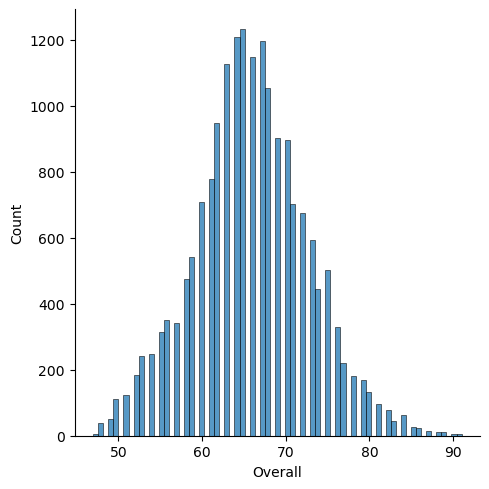

In [ ]:
sns.displot(df_fifa_players["Overall"])

<Axes: xlabel='count', ylabel='Best Position'>

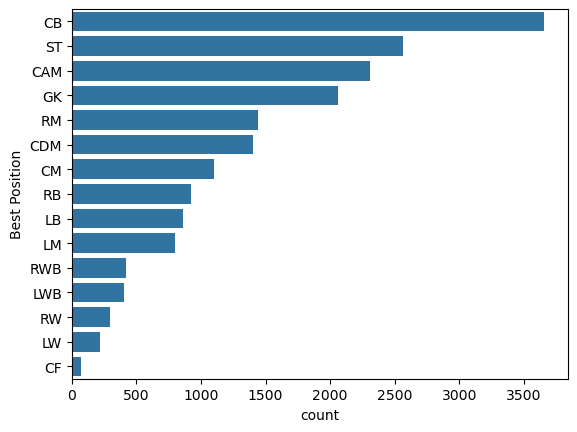

In [ ]:
sns.countplot(
    df_fifa_players["Best Position"],
    order=df_fifa_players["Best Position"].value_counts().index,
)